# SI 618 - Homework #1: Data Manipulation

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel! **

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

<span style="color:magenta"> NOTE: You will only need the file named "athlete_events.csv" </span>

In [3]:
MY_UNIQNAME = 'tabbie' # please fill in your uniqname

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### <span style="color:magenta"> 5 pt: Describe the dataset. </span>
- How many number rows and columns do you see in the data frame? 
- Are there any other interesting descriptive details?

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
df = pd.read_csv("athlete_events.csv.zip", index_col=None)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
len(df)

271116

In [6]:
len(df.columns)

15

Please note that the dataframe "athlete_events.csv" is assigned to the variable "df". The number of rows in the athlete_events.csv dataframe are 271116 and the number of columns in the athlete_events.csv dataframe are 15.

In [7]:
df_males = df[ (df['Sex'] == 'M') ]
males = df_males.drop_duplicates('Name', keep = "first")
len(males.Name.value_counts())

100979

In [8]:
df_females = df[ (df['Sex'] == 'F') ]
females = df_females.drop_duplicates('Name', keep = "first")
len(females.Name.value_counts()) 

33808

In [9]:
df.Year.max() - df.Year.min()

120

In [10]:
df.Year.max()

2016

In [11]:
df.Year.min()

1896

In [12]:
season = df.filter(['Season'], axis = 1)
season.Season.value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

Some interesting details about the dataframe are as follows:
- The dataframe consists of data of 120 years (1896-2016).
- The number of male athletes were more in number than the number of female athletes. The number of male athletes being 100979 and the number of female athletes being 33808. 
- The Olympics took place mostly in Summer season than in Winter season. The number of times Olympics took place in Summer season was 222552 and that in Winter season was 48564.

### <span style="color:magenta"> 5 pt: Without using dataframe.describe(), calculate the mean age, height, and weight for athletes in the data. Round your answer to the nearest hundredths. </span>

In [13]:
round(df['Age'].mean(), 3)

25.557

In [14]:
round(df['Height'].mean(), 3)

175.339

In [15]:
round(df['Weight'].mean(), 3)

70.702

In the data "athlete_events.csv.zip":

The Mean Age of the athletes is 25.557.

The Mean Height of the athletes is 175.339.

The Mean Weight of the athletes is 70.702.

### <span style="color:magenta"> 5 pt: According to the data, how many unique cities have hosted the Olympic games? How many cities have hosted mutliple times? Which ones? </span>
You will likely want to use drop_duplicates() on some subset of your athlete dataframe.

In [16]:
all_cities = df[['Year', 'City']].drop_duplicates(subset=['Year'])
all_cities.City.value_counts()

Athina               3
London               3
Paris                2
Sarajevo             1
Mexico City          1
Squaw Valley         1
Helsinki             1
Barcelona            1
Innsbruck            1
Montreal             1
Torino               1
Los Angeles          1
Salt Lake City       1
Beijing              1
Rio de Janeiro       1
Stockholm            1
Amsterdam            1
Berlin               1
Nagano               1
Calgary              1
Antwerpen            1
Atlanta              1
Cortina d'Ampezzo    1
St. Louis            1
Lillehammer          1
Sochi                1
Munich               1
Lake Placid          1
Sydney               1
Vancouver            1
Name: City, dtype: int64

In [17]:
len(all_cities)

35

According to the data, 32 unique cities have hosted Olympic games. 

They are:St. Louis, Antwerpen, Rio de Janeiro, Amsterdam, Munich, Calgary, Cortina d'Ampezzo, Beijing, Sochi, Barcelona, Los Angeles, Squaw Valley, Helsinki      , Sydney, Vancouver, Lake Placid, Mexico City, Atlanta, Sarajevo, Salt Lake City, Berlin, Innsbruck, Lillehammer, Torino, Nagano, Stockholm, Montreal.

There were 3 cities that hosted the Olympic games multiple times. 

They are: London, Athina and Paris.

### <span style="color:magenta"> 10 pt: Generate histogram plots for the age, weight, and height for Norwegian female athletes who competed in the 1970s. Describe the plots and point out any interesting aspects. </span>

In [18]:
norwegian_females = df[ (df['Team'] == 'Norway') & (df['Sex'] == 'F') ]
norway_final = norwegian_females[(norwegian_females.Year // 10 == 197)]
norway_final

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6755,3788,Grete Andersen-Waitz,F,18.0,172.0,53.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Athletics,"Athletics Women's 1,500 metres",NaN
6756,3788,Grete Andersen-Waitz,F,22.0,172.0,53.0,Norway,NOR,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Women's 1,500 metres",NaN
7387,4131,Trine Helene Andresen (-Svendheim),F,16.0,158.0,54.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,NaN
7388,4131,Trine Helene Andresen (-Svendheim),F,16.0,158.0,54.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,NaN
7389,4131,Trine Helene Andresen (-Svendheim),F,16.0,158.0,54.0,Norway,NOR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Floor Exercise,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232315,116542,Sigrid Milfrid Sundby-Dybedahl,F,29.0,172.0,74.0,Norway,NOR,1972 Winter,1972,Winter,Sapporo,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
232316,116542,Sigrid Milfrid Sundby-Dybedahl,F,33.0,172.0,74.0,Norway,NOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,Speed Skating Women's 500 metres,NaN
232317,116542,Sigrid Milfrid Sundby-Dybedahl,F,33.0,172.0,74.0,Norway,NOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
232318,116542,Sigrid Milfrid Sundby-Dybedahl,F,33.0,172.0,74.0,Norway,NOR,1976 Winter,1976,Winter,Innsbruck,Speed Skating,"Speed Skating Women's 1,500 metres",NaN


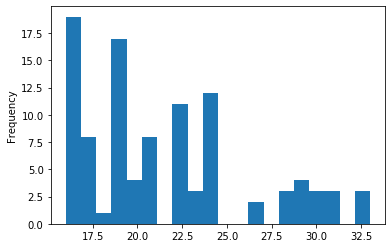

In [19]:
norway_final.Age.plot.hist(bins = 20)

The above histogram of age of the Norwegian females in 1970's shows that the frequency of the females in age group (14.5-15 years) was highest and the frequency of the number of females in the age group of 17.5 to 18 years was the lowest. We can notice that the histogram is positively skewed hence showing that as age increased the participation of Norwegian females in the Olympic games in 1970's decreased.   

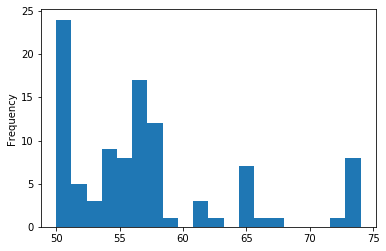

In [20]:
norway_final.Weight.plot.hist(bins = 20)

The above histogram of age of the Norwegian females in 1970's shows that most females weighed about 50 to 51 kilograms thereby showing highest frequency and the frequency of the number of females in the weight range 58.5 to 59.5 kilograms, 62 to 63 kilograms, 65.5 to 68 kilograms and 72 to 73 kilograms was the lowest. We can notice that the histogram is positively skewed hence showing that as weight increased the participation of Norwegian females in the Olympic games in 1970's decreased. 

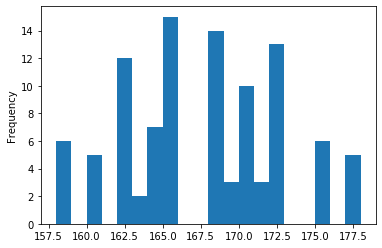

In [21]:
norway_final.Height.plot.hist(bins = 20)

The above histogram of age of the Norwegian females in 1970's shows that the frequency of the females in height range 165 to 166 centimeter was highest and the frequency of the number of females in the height range of 163 to 164 centimeters was the lowest. We can notice that the histogram shows normal distribution hence there was greater participation of Norwegian females of the height 165 to 168 centimeters (which is the center spread of the histogram) in the Olympic games in 1970's. The histogram is symmetric.

In [22]:
norway_final.Age.Weight.Height.plot.hist(bins = 20)

AttributeError: 'Series' object has no attribute 'Weight'

### <span style="color:magenta"> 10 pt: Which athlete competed in the most number of events? In which events did the athelete participate, and for what range of years? Which country did the athlete represent? </span>

In [99]:
athlete_most = df.Name.value_counts()
athlete_most

Robert Tait McKenzie         58
Heikki Ilmari Savolainen     39
Joseph "Josy" Stoffel        38
Ioannis Theofilakis          36
Takashi Ono                  33
                             ..
Rustam Iskandari              1
Mubarak Moustafa Nooralla     1
mile Jaques-Dalcroze          1
Willy von Eschen              1
Solveig Kristina Ranudd       1
Name: Name, Length: 134732, dtype: int64

In [107]:
athlete_canada = df[df.Name == "Robert Tait McKenzie"]
len(athlete_canada)

58

In [101]:
events = athlete_canada.Event.value_counts()
events

Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing                         1
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Art Competitions Mixed Sculpturing, Medals                 1
Name: Event, dtype: int64

In [102]:
events.sum()

58

In [103]:
athlete_canada.Year.max()

1948

In [104]:
athlete_canada.Year.min()

1912

The athlete named Robert Tait McKenzie competed most number number of event. The total number of events in which he competed was 58. The name of the event in which he competed most was Art Competitions Mixed Sculpturing for 36 years (1912 - 1948). The athlete was from the country Canada.

### <span style="color:magenta"> 10 pt: How many gold, silver, and bronze medals did Sawao Kato, one of the most successful Olympic athletes of all time, win during his Olympic career? What is the breakdown of events and medal types won for each? </span>

In [108]:
sawao_kato = df[df.Name == 'Sawao Kato']
sawao_kato.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
114521,57998,Sawao Kato,M,22.0,163.0,59.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Individual All-Around,Gold
114522,57998,Sawao Kato,M,22.0,163.0,59.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Team All-Around,Gold
114523,57998,Sawao Kato,M,22.0,163.0,59.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Floor Exercise,Gold
114524,57998,Sawao Kato,M,22.0,163.0,59.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horse Vault,NaN
114525,57998,Sawao Kato,M,22.0,163.0,59.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Parallel Bars,NaN


In [114]:
sawao_kato_gold = sawao_kato[ (sawao_kato.Medal == 'Gold')]
sawao_kato_gold.groupby("Event").Medal.value_counts()

Event                                   Medal
Gymnastics Men's Floor Exercise         Gold     1
Gymnastics Men's Individual All-Around  Gold     2
Gymnastics Men's Parallel Bars          Gold     2
Gymnastics Men's Team All-Around        Gold     3
Name: Medal, dtype: int64

In [116]:
sawao_kato_silver = sawao_kato[ (sawao_kato.Medal == 'Silver')]
sawao_kato_silver.groupby("Event").Medal.value_counts()

Event                                   Medal 
Gymnastics Men's Horizontal Bar         Silver    1
Gymnastics Men's Individual All-Around  Silver    1
Gymnastics Men's Pommelled Horse        Silver    1
Name: Medal, dtype: int64

In [117]:
sawao_kato_bronze = sawao_kato[ (sawao_kato.Medal == 'Bronze')]
sawao_kato_bronze.groupby("Event").Medal.value_counts()

Event                   Medal 
Gymnastics Men's Rings  Bronze    1
Name: Medal, dtype: int64

Sawao Kato won overall 8 gold medals. One gold medal for Gymnastics Men's Floor Exercise, two gold medals for Gymnastics Men's Individual All-Around and Gymnastics Men's Parallel Bars and three gold medals for Gymnastics Men's Team All-Around.

Sawao Kato won overall 3 silver silver medals. One for Gymnastics Men's Horizontal Bar, one for Gymnastics Men's Individual All-Around and one for Gymnastics Men's Pommelled Horse.

Sawao Kato won one bronze medal for Gymnastics Men's Rings.

### <span style="color:magenta"> 10 pt: Which sport has the lowest median athlete age? </span>
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [34]:
sport = df.groupby('Sport').median()
sport.Age.min()

18.0

In [37]:
sport.sort_values('Age', ascending = True)

,ID,Age,Height,Weight,Year
Sport,,,,,
Rhythmic Gymnastics,74287.5,18.0,168.0,49.0,2004.0
Swimming,68741.0,20.0,178.0,70.0,1988.0
Synchronized Swimming,66007.0,22.0,168.0,55.0,2004.0
Figure Skating,68162.0,22.0,168.0,57.0,1988.0
Diving,65551.0,22.0,167.0,60.0,1984.0
...,...,...,...,...,...
Shooting,67976.0,33.0,174.0,74.0,1976.0
Polo,46149.0,35.0,177.5,NaN,1920.0
Alpinism,87013.0,38.0,NaN,NaN,1924.0


The sport Rhythmic Gymnastics has the lowest median athlete age of 18 years.

### <span style="color:magenta"> 10 pt: Which country won the most medal points in all of the games held in 1992? </span>
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [118]:
df['Score'] =''    
df.loc[df['Medal'] == 'Gold', 'Score'] = 3
df.loc[df['Medal'] == 'Silver', 'Score'] = 2
df.loc[df['Medal'] == 'Bronze', 'Score'] = 1
df_medal = df.filter(['NOC', 'Year', 'Medal', 'Score'], axis = 1)
df_medal.groupby('NOC').Medal.value_counts().to_frame()

Medal
NOC Medal        
AFG Bronze      2
AHO Silver      1
ALG Bronze      8
    Gold        5
    Silver      4
...           ...
ZAM Bronze      1
    Silver      1
ZIM Gold       17
    Silver      4
    Bronze      1

[362 rows x 1 columns]

In [119]:
df_medal_92 = df_medal['Year'] == 1992
df_medal_992 = df_medal[df_medal_92]
df_medal_1992 = df_medal_992.dropna()
df_medal_1992

,NOC,Year,Medal,Score
60,NOR,1992,Gold,3
61,NOR,1992,Bronze,1
208,HUN,1992,Silver,2
223,ITA,1992,Silver,2
228,ITA,1992,Silver,2
...,...,...,...,...
270641,EUN,1992,Gold,3
270960,SLO,1992,Bronze,1
270976,EUN,1992,Bronze,1
271015,NED,1992,Silver,2


In [120]:
df_medal_won = df_medal_1992.groupby('NOC').Score.sum()
df_medal_won.sort_values(ascending = False)

NOC
EUN    604
GER    500
USA    483
ESP    185
CAN    177
      ... 
THA      1
COL      1
SUR      1
PUR      1
QAT      1
Name: Score, Length: 65, dtype: int64

The country EUN, that is; the Soviet Union (except the Baltic States) won the most medal points. The number of medal points being 604.

### <span style="color:magenta"> 15 pt: The Soviet–American Cold War was a period of tension between the two superpowers between approximately the end of WWII and the late 1980s with the latent ideological tension playing out in a variety of ways including the Olympic Games. Which of the two countries won the most medals during the Cold War? </span>

Note that to answer this question you will need to determine reasonable values for the beginning and end years of the Cold War. There is no single correct answer and you should justify your choices, citing your sources as appropriate.

In [121]:
df_coldwar1 = df['Year'].between(1947, 1991, inclusive = True)
df_coldwar = df[df_coldwar1]
df_coldwar.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Score
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.5,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1


In [122]:
most_medal = df_coldwar.dropna()
most_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Score
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,3
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,3
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,3
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,1


In [13]:
medal_won = most_medal.groupby('NOC').Score.sum()
medal_won.sort_values(ascending = False)

NOC
URS    4851
USA    4044
GDR    2111
FRG    1094
HUN     992
       ... 
PAN       2
ISV       2
BER       1
GUY       1
DJI       1
Name: Score, Length: 82, dtype: int64

The Cold War period was from 1947 to 1991 as stated in the article on https://en.wikipedia.org/wiki/Cold_War. The countries URS (United Regions of Siberia) and USA (United States of America) won the most number of medals during the Cold War. The number of medals won by URS were 4851 and those won by USA were 4044.

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas